In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
import pandas as pd
import sqlite3 as db

                        Open     High      Low    Close  Volume
Date                                                           
2014-02-10 07:00:00  1268.39  1269.68  1268.14  1269.66    1756
2014-02-10 08:00:00  1269.62  1274.90  1269.32  1272.77    3108
2014-02-10 09:00:00  1272.79  1273.54  1271.41  1271.87    2251
2014-02-10 10:00:00  1271.87  1274.90  1271.86  1274.70    3509
2014-02-10 11:00:00  1274.70  1276.10  1272.97  1273.40    2272
2014-02-10 12:00:00  1273.39  1273.88  1272.43  1272.99    1794
2014-02-10 13:00:00  1272.99  1272.99  1271.62  1272.52    1958
2014-02-10 14:00:00  1272.52  1274.74  1272.23  1274.44    3118
2014-02-10 15:00:00  1274.44  1277.83  1273.51  1274.23    5244
2014-02-10 16:00:00  1274.22  1275.65  1272.64  1275.47    4455
2014-02-10 17:00:00  1275.49  1277.26  1273.54  1274.55    5303
2014-02-10 18:00:00  1274.55  1275.79  1274.19  1275.65    3276
2014-02-10 19:00:00  1275.60  1276.26  1273.98  1274.69    2004
2014-02-10 20:00:00  1274.67  1275.53  1

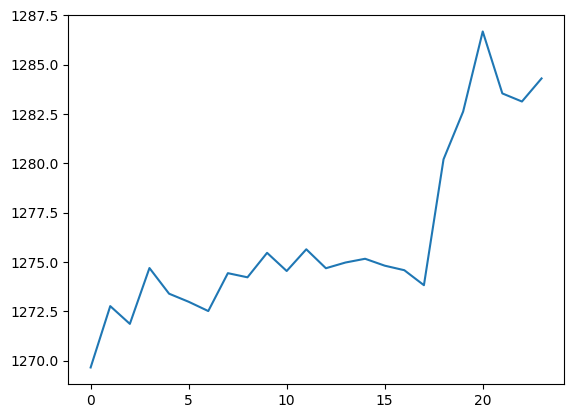

In [25]:
# get historical market data
df_original = pd.read_csv('C:/Users/yoonus/Documents/GitHub/Stock_AI_Predictor/Data/XAUUSD60.csv')

# create the datetime index from the Date and the Time columns
df_original['Date'] = pd.to_datetime(df_original['Date'] + ' ' + df_original['Time'])
df_original['Date'] = df_original['Date'].astype('datetime64[s]')
df_original = df_original.set_index('Date')

# drop the time column
df_original = df_original.drop(columns=['Time'])

# drop nan values
df_original = df_original.dropna()

df = df_original[10:40]
print(df)
arr = df['Close'].to_numpy()

# rolling windows of size 24 candles and plot using ploting function
start_i = 0
window = arr[start_i: start_i + 24]

# plot the window
plt.plot(window)

In [7]:
# Perpindiculry important points algorithm pip
def find_pips(data: np.array, n_pips: int, dist_measure: int):
    # dist_measure
    # 1 = Euclidean Distance
    # 2 = Perpindicular Distance
    # 3 = Vertical Distance

    pips_x = [0, len(data) - 1]  # Index
    pips_y = [data[0], data[-1]] # Price

    for curr_point in range(2, n_pips):

        md = 0.0 # Max distance
        md_i = -1 # Max distance index
        insert_index = -1

        for k in range(0, curr_point - 1):

            # Left adjacent, right adjacent indices
            left_adj = k
            right_adj = k + 1

            time_diff = pips_x[right_adj] - pips_x[left_adj]
            price_diff = pips_y[right_adj] - pips_y[left_adj]
            slope = price_diff / time_diff
            intercept = pips_y[left_adj] - pips_x[left_adj] * slope;

            for i in range(pips_x[left_adj] + 1, pips_x[right_adj]):
                
                d = 0.0 # Distance
                if dist_measure == 1: # Euclidean distance
                    d =  ( (pips_x[left_adj] - i) ** 2 + (pips_y[left_adj] - data[i]) ** 2 ) ** 0.5
                    d += ( (pips_x[right_adj] - i) ** 2 + (pips_y[right_adj] - data[i]) ** 2 ) ** 0.5
                elif dist_measure == 2: # Perpindicular distance
                    d = abs( (slope * i + intercept) - data[i] ) / (slope ** 2 + 1) ** 0.5
                else: # Vertical distance    
                    d = abs( (slope * i + intercept) - data[i] )

                if d > md:
                    md = d
                    md_i = i
                    insert_index = right_adj

        pips_x.insert(insert_index, md_i)
        pips_y.insert(insert_index, data[md_i])

    return pips_x, pips_y

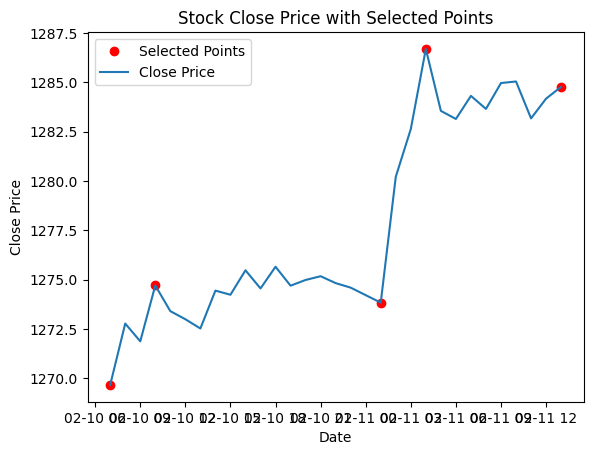

In [20]:
# convert df to numpy array
np_Df = df['Close'].to_numpy().flatten()

pips_x , pips_y = find_pips(np_Df,5,2)

# get the indecies of the dataframe corresponding to the pips_x
indeces = df.index[pips_x]

# Overlay the specific points
plt.plot(indeces , df['Close'].loc[indeces], 'ro', label='Selected Points')
# or 
#plt.plot(datetime_indices, df['Close'].iloc[pips_x], 'ro', label='Selected Points')

plt.plot(df['Close'], label='Close Price')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price with Selected Points')
plt.legend()

# Show the plot
plt.show()